# 텍스트 유사도
## 코사인 유사도
단어나 문장을 벡터로 표현할 수 있다면 벡터 간 거리나 각도를 이용해 유사성을 파악할 수 있다. 코사인 유사도(cosine similarity)도 그 중 하나의 방법이다.

코사인 유사도는 두 벡터 간 코사인 각도를 이용해 유사도를 측정하는 방법이다. 일반적으로 코사인 유사도는 벡터의 크기가 중요하지 않을 때 그 거리를 측정하기 위해 사용한다. 예를 들어 단어의 출현 빈도를 통해 유사도 계산을 한다면 동일한 단어가 많이 포함되어 있을수록 벡터의 크기가 커진다. n-gram의 경우 동일한 단어가 문서 내에 자주 등장하면 유사도 결과에 안 좋은 영향을 미칠 수 밖에 없다. 

n-gram 정리 링크 : https://colab.research.google.com/drive/18YcYAvd-psW-hKOjIizX_qQU9q1hRBQW?hl=ko#scrollTo=PgOin4Dwa-UV

코사인은 -1~1 사이의 값을 가지며, 두 벡터의 방향이 완전히 동일한 경우에는 1, 반대 방향인 경우에는 -1, 두 벡터가 서로 직각을 이루면 0의 값을 가진다. 즉, 두 벡터의 방향이 같아질수록 유사하다 볼 수 있다. 다음은 코사인 유사도의 수식이다.

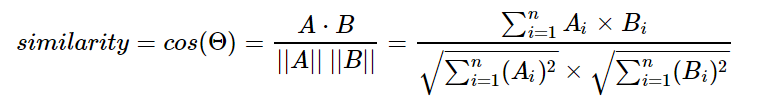

## 코사인 유사도를 이용해 아래 두 문장의 유사도를 계산하는 과정

A : "2000년에 사쿠라이 쇼는 게이오에 입학했다."
B : "2000년에 사쿠라이 쇼는 대학교에 입학했다."

다음 그림으느 문장 A와 문장 B에서 단어 토큰(명사)만 추출하여 단어 문서 행렬을 표현한 표이다. 행렬의 열은 문장 A와 B의 단어 토큰값이며, 행은 문장 A와 B로 구성되어 있다. 열에 나열된 토큰들은 문장 A와 B에 얼마만큼 출현되는지 나타내고 있다. 각 문장에서 토큰이 나올 때마다 +1씩 카운트했다.


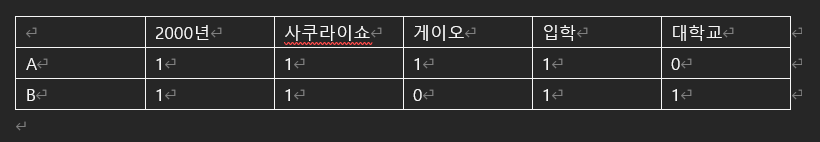

### 코사인 유사도의 수식을 이용해 유사도를 계산하는 과정

A= [1,1,1,1,0]

B= [1,1,0,1,1]

앞의 코사인 유사도 수식의 분자를 계산한다. 코사인 유사도 수식의 분자는 두 벡터의 내적을 의미한다.


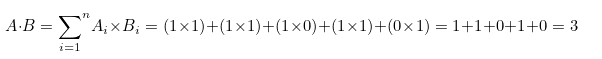

다음으로 코사인 유사도 수식의 분모를 계산한다. 코사인 유사도 수식의 분모는 두 벡터의 크기의 곱을 의미한다.

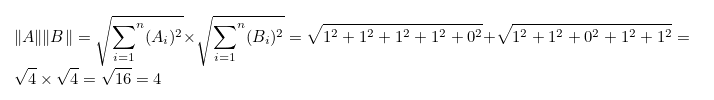

두 벡터의 내적은 3, 두 벡터 크기의 곱은 4가 나온다. 이 계산 값을 이용해 코사인 각도를 계산하면 0.75가 나온다. 즉, 문장 A와 B는 75%의 유사성을 갖고 있다. 

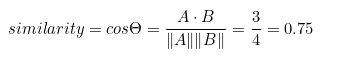

In [1]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 57.2 MB/s 


In [2]:
from konlpy.tag import Komoran
import numpy as np
from numpy import dot
from numpy.linalg import norm

In [17]:
# 코사인 유사도 계산
def cos_sim(vec1, vec2):
  return dot(vec1, vec2) / (norm(vec1) * norm(vec2))

In [4]:
# TDM 만들기
def make_term_doc_mat(sentence_bow, word_dics):
  freq_mat = {}

  for word in word_dics:
    freq_mat[word] = 0

  for word in word_dics:
    if word in sentence_bow:
      freq_mat[word] += 1 # 추출한 단어 사전 기준으로 문장에 해당 단어들이 얼마나 포함되어 있는지 나타낸다.

  return freq_mat

In [5]:
# 단어 벡터 만들기
def make_vector(tdm):
  vec = []
  for key in tdm :
    vec.append(tdm[key]) #토큰들의 출현 빈도 데이터를 벡터로 만들어준다.
  return vec

In [10]:
# 문장 정의
sentences1 = "2000년에 사쿠라이 쇼는 게이오에 입학했다."
sentences2 = "2000년에 사쿠라이 쇼는 대학교에 입학했다."
sentences3 = "나는 아라시 랩을 사쿠라이 쇼와 함께 불렀다."

In [11]:
# 형태소 분석기를 이용해 단어 묶음 리스트 생성
komoran = Komoran()
bow1 = komoran.nouns(sentences1)
bow2 = komoran.nouns(sentences2)
bow3 = komoran.nouns(sentences3)

In [12]:
# 단어 묶음 리스트를 하나로 합침
bow = bow1 + bow2 +bow3

In [13]:
# 단어 묶음에서 중복을 제거해 단어 사전 구축
word_dics=[]
for token in bow :
  if token not in word_dics:
    word_dics.append(token)

In [14]:
# 문장별 단어 문서 행렬 계산
freq_list1 = make_term_doc_mat(bow1, word_dics)
freq_list2 = make_term_doc_mat(bow2, word_dics)
freq_list3 = make_term_doc_mat(bow3, word_dics)
print(freq_list1)
print(freq_list2)
print(freq_list3)

{'년': 1, '사쿠라이 쇼': 1, '게이오': 1, '입학': 1, '대학교': 0, '아라시': 0, '랩': 0}
{'년': 1, '사쿠라이 쇼': 1, '게이오': 0, '입학': 1, '대학교': 1, '아라시': 0, '랩': 0}
{'년': 0, '사쿠라이 쇼': 1, '게이오': 0, '입학': 0, '대학교': 0, '아라시': 1, '랩': 1}


In [15]:
# 문장 벡터 생성
doc1 = np.array(make_vector(freq_list1))
doc2 = np.array(make_vector(freq_list2))
doc3 = np.array(make_vector(freq_list3))

In [18]:
# 코사인 유사도 계산
r1 = cos_sim(doc1, doc2)
r2 = cos_sim(doc3, doc1)
print(r1)
print(r2)

0.75
0.2886751345948129


이전 n-gram의 유사도는 0.5로, 현재 코사인 유사도가 더 높게 나온 것을 알 수 있다. 또한 r2 역시도 0.288..로 n-gram 유사도의 0보다 높지만 조금이나마 연관성이 있는 것으로 나왔다. 이렇듯 n-gram 유사도에 비해 성능상 이점이 많은 것을 확인할 수 있었다.